<h1 style='color: green; font-size: 36px; font-weight: bold;'>Projeto de Ciência de Dados - Análise do Enem</h1>

# <a name='descricao'>Descrição</a>
A princípio esta análise visa observar o impacto que fatores socioeconômicos possam causar no desempenho de alunos, que efetuaram a prova objetiva de <b>Matemática e Suas Tecnologias</b> no ano de 2021. Sendo que, esta avaliação é uma constituinte do Exame Nacional do Ensino Médio (Enem).<br><br> Para esta análise, será utiliza como amostra alunos dentre 17 e 18 anos, concluintes recentes, ou próximos de concluir, o ensino médio regular.<br>
A base de dados utilizada foram os microdados do Enem de 2021. Disponibilizados pelo Inep no link:
    https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem. <br><br>
Após o tratamento das informações, segue-se uma observação geral dos dados. Sendo também empregado recursos gráficos, os quais possibilitam uma síntese das informações apresentadas na seção de Discussão.

### Features selecionadas e descrição:
<ul style='font-size: 14px; line-height: 1,5 ; text-align: justify;'>
    <li><b>TP_FAIXA_ETARIA</b> - Faixa etária separada por categorias que vão de 1 (menor de 17 anos) até 20 (maior de 70 anos)</li>
    <li><b>TP_SEXO</b> - Sexo separado em M (masculino) e F (feminino).</li>
    <li><b>TP_COR_RACA</b> - Cor/raça, representado por números. Sendo 0, não informado; 1, branca; 2, preta; 3, parda; 4, amarela; 5, indigena; 6, não dispões da informação.</li>
    <li><b>TP_ST_CONCLUSAO</b> - Situação de conclusão do Ensino Médio. Sendo 1, já concluí o Ensino Médio; 2, cursando e conclusão em 2021; 3, cursando e concluirá após 2021; 4, Não concluiu e não está cursando.</li>
    <li><b>TP_ESCOLA</b> - Tipo de escola do Ensino Médio. Sendo 1, não respondeu; 2, Pública; 3, privada.</li>    
    <li><b>NO_MUNICIPIO_ESC</b> - Nome do município da escola.</li>    
    <li><b>SG_UF_ESC</b> - Sigla da Unidade da Federação da escola.</li>
    <li><b>TP_LOCALIZACAO_ESC</b> - Localização da escola, se é área urbana ou rural.</li>
    <li><b>NU_NOTA_MT</b> - Nota da prova de matemática.</li>
    <li><b>Q0XX</b> - Questões do questionário socioeconômico, que vão de Q001 até Q025.</li>
</ul>

# <a name='indice'>Índice</a>
* [Descrição](#descricao)

* [1. Importando Bibliotecas e Base de Dados](#secao_1)
* [2. Conhecendo e Tratando a Base de Dados](#secao_2)
* [3. Análise Descritiva](#secao_3)
* [4. Observando percentis](#secao_4)
* [5. Análise de outliers](#secao_5)
* [6. Gráficos](#secao_6) 
* [7. Análise Geográfica](#secao_7)
* [Discussão](#discussão)

#  <a name="secao_1"><font style='font-size: 30px;'>1 Importando Bibliotecas e Base de Dados</font></a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

In [21]:
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gdp

sns.set_palette('Accent')
sns.set_style('darkgrid')

In [5]:
enem_df = pd.read_csv('dados/MICRODADOS_ENEM_2021.csv', encoding = 'latin_1', sep=';')

#  <a name="secao_2">2. Conhecendo e Tratando a Base de Dados</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

#### Informações gerais

In [3]:
enem_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            3389832 non-null  int64  
 1   NU_ANO                  3389832 non-null  int64  
 2   TP_FAIXA_ETARIA         3389832 non-null  int64  
 3   TP_SEXO                 3389832 non-null  object 
 4   TP_ESTADO_CIVIL         3389832 non-null  int64  
 5   TP_COR_RACA             3389832 non-null  int64  
 6   TP_NACIONALIDADE        3389832 non-null  int64  
 7   TP_ST_CONCLUSAO         3389832 non-null  int64  
 8   TP_ANO_CONCLUIU         3389832 non-null  int64  
 9   TP_ESCOLA               3389832 non-null  int64  
 10  TP_ENSINO               1096828 non-null  float64
 11  IN_TREINEIRO            3389832 non-null  int64  
 12  CO_MUNICIPIO_ESC        813806 non-null   float64
 13  NO_MUNICIPIO_ESC        813806 non-null   object 
 14  CO

In [4]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [5]:
enem_df.shape

(3389832, 76)

#### Obtenção das features pertinentes

In [6]:
enem_df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

* Serão selecionadas features as quais sejam pertinentes para o objetivo da análise. <br>
* Apesar de desejável, a coluna TP_ENSINO contém muitos valores faltantes, portanto não será inclusa. <br>
* A feature TP_PRESENCA_MT possui certa redundância, havendo baixa quantidade de eliminados na prova, permite que esssa feature seja melhor representada pela NU_NOTA_MT. Pois, todos que compareceram à prova, obtiveram nota. <br>
* O conjunto de features que diz respeito ao local de aplicação das provas, não será utilizada. Em contrapartida, haverá proveito quanto as que dizem respeito ao local de estudos do aluno. Porém, há muitos registros faltantes e, portanto, haverá de receber um certo cuidado.

In [6]:
alunos_df = enem_df[['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA', 'TP_ST_CONCLUSAO','TP_ESCOLA', 
       'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_LOCALIZACAO_ESC', 'NU_NOTA_MT',      
       'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']]

### Consolidando base de dados

#### Selecionando alunos na faixa etária entre 17 e 18 anos

In [7]:
mat_alunos_df = alunos_df.loc[(alunos_df['TP_FAIXA_ETARIA']>=2) & (alunos_df['TP_FAIXA_ETARIA']<=3)]

#### Filtrar para concluintes recentes e próximos de concluir

In [8]:
mat_alunos_df = mat_alunos_df.loc[(mat_alunos_df['TP_ST_CONCLUSAO']<=2)]

#### Excluir valores faltantes da coluna NU_NOTA_MT

In [9]:
mat_alunos_df = mat_alunos_df.dropna(subset='NU_NOTA_MT')

#### Excluir demais valores faltantes

Como há muitos valores faltantes quanto às features de localização (CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC, SG_UF_ESC, TP_DEPENDENCIA_ADM_ESC e TP_LOCALIZACAO_ESC), a partir deste ponto há algumas alternativas. Citando duas delas:
* preencher os valores faltantes;
* descartar esses registros.

Devido a riqueza e variabilidade das features, seguirei com a segunda das alternativas. Apesar de reduzir ainda mais o dataset, é presumido evitar maiores distorções e conclusões errôneas nas etapas seguintes.

In [10]:
mat_alunos_df = mat_alunos_df.dropna()

### Tratar features qualitativas

#### TP_FAIXA_ETARIA

In [11]:
mat_alunos_df.TP_FAIXA_ETARIA = mat_alunos_df.TP_FAIXA_ETARIA.map({2:'17', 3:'18'})

#### TP_SEXO

In [12]:
mat_alunos_df.TP_SEXO = mat_alunos_df.TP_SEXO.map({'M':'Masculino', 'F':'Feminino'})

#### TP_COR_RACA

In [13]:
mat_alunos_df.TP_COR_RACA = mat_alunos_df.TP_COR_RACA.map(
    {0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não dispõe da informação'})

#### TP_ST_CONCLUSAO

In [14]:
mat_alunos_df.TP_ST_CONCLUSAO.unique()

array([2], dtype=int64)

Como a seleção pela faixa etária acabou excluíndo alunos que já concluíram o ensino médio, a feature TP_ST_CONCLUSAO acabou se tornando redundante e será excluída.

In [15]:
mat_alunos_df.drop(columns='TP_ST_CONCLUSAO', axis=1, inplace=True)

#### TP_ESCOLA

In [16]:
mat_alunos_df.TP_ESCOLA = mat_alunos_df.TP_ESCOLA.map({2:'Público', 3:'Privada'})

#### TP_LOCALIZACAO_ESC

In [17]:
mat_alunos_df.TP_LOCALIZACAO_ESC = mat_alunos_df.TP_LOCALIZACAO_ESC.map({1:'Urbana', 2:'Rural'})

### Transformando as features do questionário socioeconomico em variáveis numéricas

In [18]:
quest_alunos_df = mat_alunos_df.copy()

As quatro primeiras questões do questionário socioeconômico dizem respeito à escolaridade dos pais e, assim como, a ocupação de ambos. Essas variáveis considero interessante também torná-las numéricas. Todavia, será atribuido outro valor as respostas da categoria <font color='red'><i>"Não sei"</i></font>.<br><br>
Nas variáveis Q001 e Q002 da categoria A até a categoria G, irei atribuir valores de 0 à 6. Desta forma, para não perder mais dados e ciente de leves distorções, considero razoável atribuir à categoria H o valor da média aritmética de todos os termos. O que equivale à 3.<br><br>
Já nas variáveis Q003 e Q004 as categorias de A até a E, serão atribuídos valores de 0 à 4. E a sua última categoria (F, a qual representa o valor <i>"Não sei"</i>), também será atribuída a média aritmética, resultando no valor 2.



<font color='red'> Atenção</font><br>

Transformar a variável Q006 a qual diz respeito à faixa de renda, em uma variável numérica, possa aumentar sua usabilidade. Entre o limite inferior e superior de cada faixa, optarei por inserir o seu limite superior. Mas, deve-se ter cautela quanto ao uso, pois tais dados carecem de continuidade.<br>

A última faixa (Q), cuja renda é "acima de R$ 22.000,00", será alterada para representar um "teto" de 30000. Isso para não conflitar com a faixa diretamente anterior (P).

In [19]:
def dict_renda():
    '''A função atribui um valor numérico para cada categoria de renda'''
    
    dict_renda = {'A':0, 'B':1100, 'C':1650, 'D':2200, 'E':2750, 'F':3300,'G':4400, 'H':5500, 'I':6600,
                  'J':7700, 'K':8800, 'L':9900, 'M':11000, 'N':13200,'O':16500, 'P':22000, 'Q':30000}
    return dict_renda

In [20]:
def auto_map_questionario(questao):
    '''Essa função reconhece o número de alternativas na questão e aplica o map correto.
    As transformando as variáveis em numéricas'''
    
    qtde_alternativas = len(quest_alunos_df[questao].unique())
    
    if qtde_alternativas == 8:
        # mapeia a Q001 à Q002
        quest_alunos_df[questao] = quest_alunos_df[questao].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':3})
        
    elif qtde_alternativas == 6:
        # mapeia a Q003 à Q004
        quest_alunos_df[questao] = quest_alunos_df[questao].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':2})
        
    elif qtde_alternativas == 17:
        # mapeia a Q006
        quest_alunos_df[questao] = quest_alunos_df[questao].map(dict_renda())
    
    elif qtde_alternativas == 4:
        # mapeia a Q007
        quest_alunos_df[questao] = quest_alunos_df[questao].map({'A':0, 'B':1.5, 'C':3.5, 'D':5, 'E':4})
    
    # ambas mapeiam da Q008 até a última
    elif qtde_alternativas == 5:
        quest_alunos_df[questao] = quest_alunos_df[questao].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4})
        
    elif qtde_alternativas == 2:
        quest_alunos_df[questao] = quest_alunos_df[questao].map({'A':0, 'B':1})
        
    else:
        # pass Q005 que já é quantitativa
        pass 

In [21]:
# recriando o nome da questão de Q001 à Q025 e repassando como argumento para a função auto_map_questionario()
_=[auto_map_questionario('Q0{:002}'.format(i)) for i in range(1, 26)]

#### Renomeando as colunas

In [22]:
final_enem_df = quest_alunos_df.rename(columns = {'TP_FAIXA_ETARIA':'Idade', 'TP_SEXO':'Sexo', 'TP_COR_RACA':'Cor/Raça',
                                                    'TP_ESCOLA':'Escola','NO_MUNICIPIO_ESC':'Município', 'SG_UF_ESC':'UF',
                                                    'TP_LOCALIZACAO_ESC':'Localização', 'NU_NOTA_MT':'Nota em Matemática',
                                                    'Q001':'Escolaridade pai', 'Q002':'Escolaridade mãe',
                                                    'Q003':'Ocupação pai', 'Q004':'Ocupação mãe', 'Q005':'Nº de residentes',
                                                    'Q006':'Renda familiar', 'Q007':'Emp. domestico(a)', 'Q008':'Banheiros',
                                                    'Q009':'Quartos', 'Q010':'Carro', 'Q011':'Motocicleta', 'Q012':'Geladeira',
                                                    'Q013':'Freezer', 'Q014':'Máq. lavar-roupa', 'Q015':'Máq. secar-roupa',
                                                    'Q016':'Microondas', 'Q017':'Máq. lavar-louça', 'Q018':'Aspirador',
                                                    'Q019':'Televisor', 'Q020':'DVD', 'Q021':'TV por assinatura',
                                                    'Q022':'Tel. celular', 'Q023':'Tel. fixo', 'Q024':'Computador',
                                                    'Q025':'Internet'})

#### Lista de variáveis qualitativas

In [23]:
lista_variaveis = list(final_enem_df.columns)

In [24]:
variaveis_texto = ['Sexo', 'Cor/Raça', 'Escola', 'Município', 'UF', 'Localização']

#### Lista de variaveis quantitativas

In [25]:
variaveis_numericas = [var for var in lista_variaveis if var not in variaveis_texto]

#  <a name="secao_3">3. Análise Descritiva</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

#### Descrição Geral

In [28]:
final_enem_df[variaveis_numericas].describe().round()

,Nota em Matemática,Escolaridade pai,Escolaridade mãe,Ocupação pai,Ocupação mãe,Nº de residentes,Renda familiar,Emp. domestico(a),Banheiros,Quartos,...,Microondas,Máq. lavar-louça,Aspirador,Televisor,DVD,TV por assinatura,Tel. celular,Tel. fixo,Computador,Internet
count,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,...,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0,533953.0
mean,549.0,4.0,4.0,2.0,2.0,4.0,4882.0,0.0,2.0,3.0,...,1.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,1.0
std,112.0,1.0,1.0,1.0,1.0,1.0,5970.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,455.0,3.0,3.0,1.0,1.0,3.0,1650.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0
50%,534.0,4.0,4.0,2.0,2.0,4.0,2750.0,0.0,1.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0
75%,632.0,4.0,5.0,3.0,3.0,4.0,5500.0,0.0,2.0,3.0,...,1.0,0.0,1.0,2.0,1.0,1.0,4.0,0.0,2.0,1.0
max,953.0,6.0,6.0,4.0,4.0,20.0,30000.0,5.0,4.0,4.0,...,4.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,1.0


In [29]:
final_enem_df[variaveis_texto].describe().round(2)

,Sexo,Cor/Raça,Escola,Município,UF,Localização
count,533953,533953,533953,533953,533953,533953
unique,2,6,2,5205,27,2
top,Feminino,Branca,Público,São Paulo,SP,Urbana
freq,304794,270199,383307,30586,109722,518244


#### Distribuição de frequência
Tipo de Escola x Cor/Raça

In [26]:
etinias_pub_priv = pd.crosstab(final_enem_df.Escola, final_enem_df['Cor/Raça'], normalize=True)*100
etinias_pub_priv 

Cor/Raça,Amarela,Branca,Indígena,Não declarado,Parda,Preta
Escola,,,,,,
Privada,0.576830,19.905685,0.023223,0.457156,5.988917,1.261534
Público,1.266216,30.697833,0.328681,1.486648,31.047676,6.959601


Tipo de Escola x Renda

In [31]:
pd.crosstab(final_enem_df.Escola, final_enem_df['Renda familiar'], normalize=True)*100

Renda familiar,0,1100,1650,2200,2750,3300,4400,5500,6600,7700,8800,9900,11000,13200,16500,22000,30000
Escola,,,,,,,,,,,,,,,,,
Privada,0.140087,0.756808,1.198420,1.781430,1.427654,2.185398,2.544606,2.871601,2.127715,1.445446,1.277828,1.202353,2.018155,1.340193,1.639096,1.781056,2.475499
Público,3.441876,18.725618,11.752533,9.912483,5.449731,6.240437,5.305149,3.791345,2.145320,1.233255,0.895772,0.685454,0.840523,0.459778,0.407714,0.288602,0.211067


#### Matriz de correlação

In [32]:
final_enem_df[variaveis_numericas].corr(numeric_only=True).round(2)

,Nota em Matemática,Escolaridade pai,Escolaridade mãe,Ocupação pai,Ocupação mãe,Nº de residentes,Renda familiar,Emp. domestico(a),Banheiros,Quartos,...,Microondas,Máq. lavar-louça,Aspirador,Televisor,DVD,TV por assinatura,Tel. celular,Tel. fixo,Computador,Internet
Nota em Matemática,1.00,0.35,0.33,0.36,0.34,-0.06,0.42,0.23,0.37,0.24,...,0.26,0.18,0.31,0.32,0.15,0.22,0.25,0.19,0.43,0.18
Escolaridade pai,0.35,1.00,0.56,0.59,0.46,-0.05,0.47,0.24,0.43,0.28,...,0.32,0.20,0.35,0.36,0.17,0.31,0.30,0.22,0.49,0.22
Escolaridade mãe,0.33,0.56,1.00,0.44,0.62,-0.07,0.42,0.22,0.39,0.27,...,0.29,0.17,0.31,0.32,0.13,0.28,0.28,0.19,0.45,0.23
Ocupação pai,0.36,0.59,0.44,1.00,0.56,-0.05,0.52,0.30,0.48,0.30,...,0.36,0.22,0.37,0.41,0.18,0.34,0.33,0.23,0.50,0.24
Ocupação mãe,0.34,0.46,0.62,0.56,1.00,-0.07,0.49,0.30,0.45,0.30,...,0.33,0.21,0.34,0.38,0.16,0.32,0.30,0.21,0.48,0.23
Nº de residentes,-0.06,-0.05,-0.07,-0.05,-0.07,1.00,0.01,0.03,0.05,0.23,...,-0.08,0.01,-0.06,0.03,-0.02,-0.01,0.25,0.00,-0.00,-0.06
Renda familiar,0.42,0.47,0.42,0.52,0.49,0.01,1.00,0.52,0.62,0.40,...,0.34,0.38,0.43,0.52,0.26,0.42,0.34,0.27,0.61,0.16
Emp. domestico(a),0.23,0.24,0.22,0.30,0.30,0.03,0.52,1.00,0.45,0.28,...,0.19,0.27,0.22,0.35,0.16,0.26,0.17,0.16,0.35,0.07
Banheiros,0.37,0.43,0.39,0.48,0.45,0.05,0.62,0.45,1.00,0.57,...,0.38,0.32,0.44,0.57,0.24,0.39,0.38,0.26,0.57,0.19
Quartos,0.24,0.28,0.27,0.30,0.30,0.23,0.40,0.28,0.57,1.00,...,0.30,0.19,0.30,0.42,0.17,0.27,0.43,0.18,0.41,0.22


#  <a name="secao_4">4. Observando percentis</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

In [33]:
final_enem_df['Localização'].value_counts(normalize=True)

Urbana    0.97058
Rural     0.02942
Name: Localização, dtype: float64

In [34]:
final_enem_df.Escola.value_counts(normalize=True)

Público    0.717867
Privada    0.282133
Name: Escola, dtype: float64

In [35]:
final_enem_df.Sexo.value_counts(normalize=True)

Feminino     0.570826
Masculino    0.429174
Name: Sexo, dtype: float64

#  <a name="secao_5">5.  Análise de outliers</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

Para a classificação e exclusão de outliers, aplicarei como regra valores abaixo de Q1 - 1.5 x amplitude e valores acima de Q3 + 1.5 x amplitude. Sendo que, a amplitude é definida pelo valor Q1-Q3.

In [27]:
def limites(coluna):
    '''Essa function define os limites mínimo e máximo. Para que valores fora deste intervalo sejam excluídos'''
    
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude


def excluir_outliers(df, nome_coluna):
    '''Essa function exclui os outliers que estão fora da área delimitada'''
    
    qtde_linhas = df.shape[0]
    limite_inferior, limite_superior = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= limite_inferior) & (df[nome_coluna] <= limite_superior),:]
    print('Foram removidas {} linhas/outliers'.format(qtde_linhas - df.shape[0]))
    return df

In [28]:
def grafico_boxplot(coluna):
    '''Function para plotar um gráfico boxplot simples, bastando passar a coluna'''
    
    plt.figure(figsize=(10,4))
    sns.boxplot(x = coluna, showmeans=True).set(title = coluna.name.capitalize(), xlabel=None)
    
    
def grafico_boxplot_bivariada(x, y, hue, df):
    '''Function para plotar um gráfico boxplot multiplo, requer passar nome das três colunas,
    sendo opcional especificar o dataframe'''
    
    plt.figure(figsize=(14,5))
    sns.boxplot(data=df, x=df[x], y=df[y], hue=df[hue], showmeans=True).set(title=df[x].name.capitalize(),xlabel=None)

#### Feature Nota

In [29]:
final_enem_df = excluir_outliers(final_enem_df, 'Nota em Matemática')

Foram removidas 828 linhas/outliers


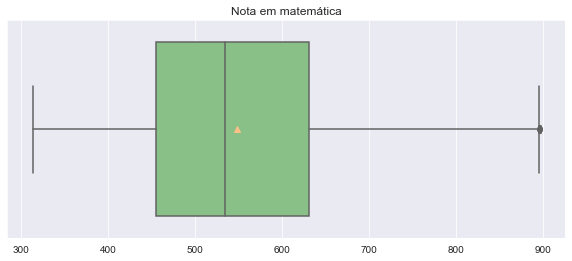

In [30]:
grafico_boxplot(final_enem_df['Nota em Matemática'])

#### Feature Renda familiar

In [31]:
final_enem_df = excluir_outliers(final_enem_df, 'Renda familiar')

Foram removidas 45519 linhas/outliers


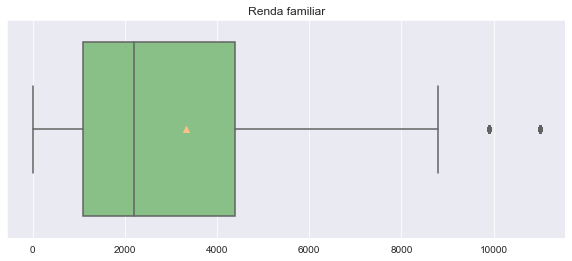

In [32]:
grafico_boxplot(final_enem_df['Renda familiar'])

Acima, apesar de removermos os alguns outliers, ainda é observado a existência de valores atípicos. E está influenciando as features Nota e Renda. Portanto, em ambos os casos, será preferível utilizar a mediana, enquanto medida de tendência central.

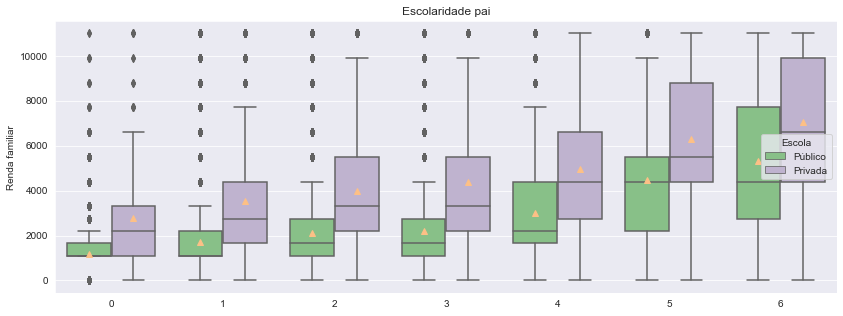

In [42]:
grafico_boxplot_bivariada('Escolaridade pai', 'Renda familiar', 'Escola', final_enem_df)

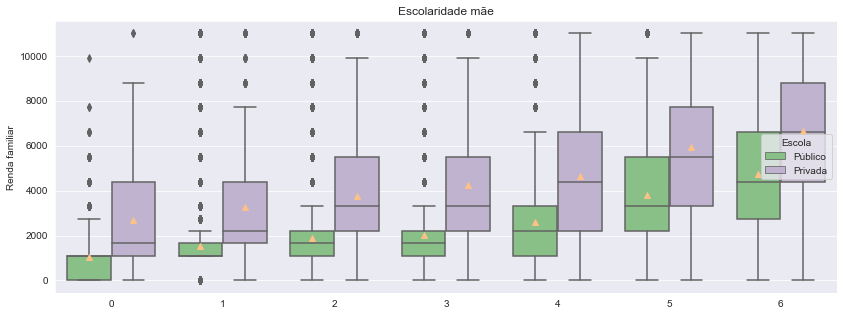

In [43]:
grafico_boxplot_bivariada('Escolaridade mãe', 'Renda familiar', 'Escola', final_enem_df)

#### Exportar ou importar base de dados já tratados

In [25]:
# final_enem_df.to_csv('dados/dados_tratados.csv', sep=';', encoding='latin1', index=False)
# final_enem_df = pd.read_csv('dados/dados_tratados.csv', sep=';', encoding='latin1')

#  <a name="secao_6">6. Gráficos</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

#### Gráfico de barras - distribuição de alunos por estado

<AxesSubplot:>

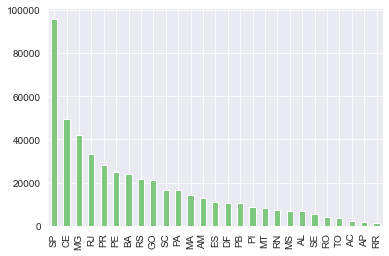

In [45]:
final_enem_df['UF'].value_counts().plot.bar()

#### Distribuição das notas com o Histograma

In [33]:
def grafico_histograma(coluna):
    '''Essa função coleta o nome da coluna e exibe o seu respectivo histograma/displot'''
    
    sns.displot(coluna, kde=True, bins=40, height=5, aspect=2)\
    .set(title = coluna.name.capitalize(),xlabel=None)

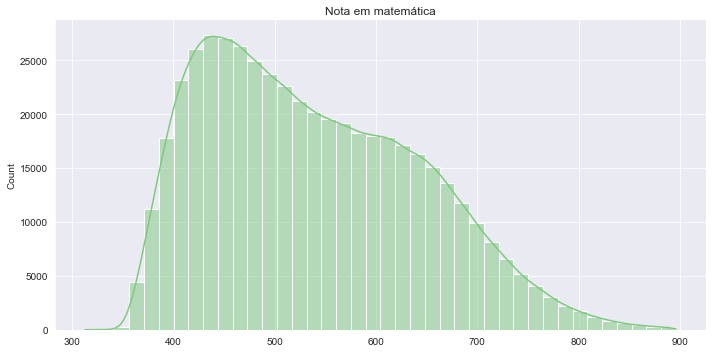

In [47]:
grafico_histograma(final_enem_df['Nota em Matemática'])

### Gráfico Pie

#### Elaborando os dados para gráfico Pie

In [101]:
etnia_por_escola = pd.crosstab(index=[final_enem_df.Escola, final_enem_df['Cor/Raça']], columns='Frequência').reset_index()

#### Mesclando grupos menores em um só

In [310]:
selecao_outros = etnia_por_escola.loc[(etnia_por_escola['Cor/Raça'] == 'Amarela') |
                                   (etnia_por_escola['Cor/Raça'] == 'Indígena') |
                                   (etnia_por_escola['Cor/Raça'] == 'Não declarado')]

In [311]:
df_outros = pd.DataFrame(selecao_outros.groupby(etnia_por_escola.Escola).sum(numeric_only=True)).reset_index()

df_outros['Cor/Raça'] = 'Outros'
df_outros = df_outros[['Escola', 'Cor/Raça', 'Frequência']]

#### Criando cópia, removendo etnias menores e adicionando grupo "outros" ao dataframe

In [319]:
df_etnia_por_escola = etnia_por_escola.copy()
df_etnia_por_escola.drop(selecao_outros.index, inplace=True)
df_etnia_por_escola = pd.concat([df_etnia_por_escola, df_outros], ignore_index=True).sort_values(by='Escola')

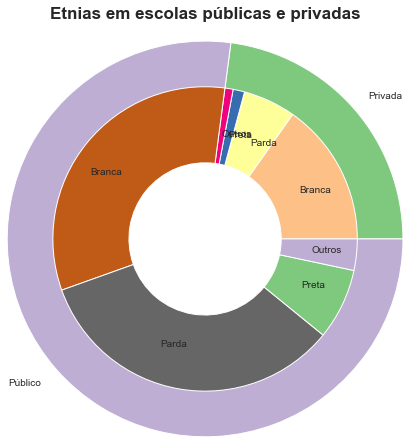

In [323]:
fig, eixo = plt.subplots(figsize = (7, 7))

eixo.pie(df_etnia_por_escola['Frequência'].groupby(df_etnia_por_escola.Escola).sum(), radius=1.3,
         labels= df_etnia_por_escola.Escola.unique(), wedgeprops=dict(width=0.5, edgecolor='w'))

eixo.pie(df_etnia_por_escola['Frequência'], labeldistance=0.7, 
         labels=df_etnia_por_escola['Cor/Raça'], wedgeprops=dict(width=0.5, edgecolor='w'))

eixo.set_title('Etnias em escolas públicas e privadas', fontsize=17, fontweight='bold', pad=30)
plt.show()

### Gráfico Matriz de correlação
Para este gráfico, irei selecionar as features que, em relação a variável dependente (Nota em Matemática), apresentem coeficiente de correlação positiva maior que 0.25 e também aquelas que tiveram correlação negativa (independente do valor de seu  coeficiente).
Devido a remoção de outliers, será feita nova aferição dos coeficientes de correlação.

In [51]:
def intervalo_coef(var_dependente, coluna, cond_maior_igual=0.25, cond_menor=0):
    '''Obtém o coeficiente de correlação entre a variável dependente e outra variável.
    E verifica se esse coeficiente está dentro de um intervalo desejado''' 
    
    coeficiente = float(final_enem_df[[var_dependente, coluna]].corr(numeric_only=True).min().sample().values)
    return coeficiente >= cond_maior_igual or coeficiente < cond_menor


def criar_lista_matriz(var_dependente, lista_var_num):
    '''Função responsável por criar lista com as colunas com resposta True à função intervalo_coef()'''
    
    return [coluna for coluna in lista_var_num if intervalo_coef(var_dependente, coluna)]

In [52]:
var_dependente = 'Nota em Matemática'
lista_matriz = criar_lista_matriz(var_dependente, variaveis_numericas)

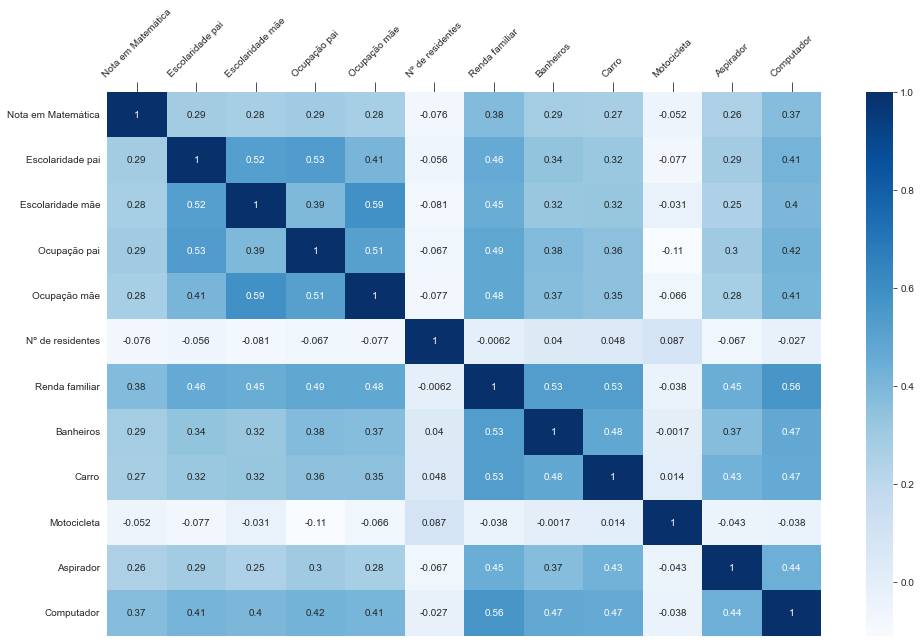

In [54]:
plt.figure(figsize=(16, 10))
grafico = sns.heatmap(final_enem_df[lista_matriz].corr(numeric_only=True), annot=True, cmap='Blues')
grafico.tick_params(axis='x', rotation=45, labeltop=True, labelbottom=False, top=True, length=10)

#  <a name="secao_7">7. Análise Geográfica</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

### Heatmap do Brasil
A fonte dos shapefiles foi Núcleo de Economia Regional e Urbana da Universidade de São Paulo (NEREUS). Disponível no link:
http://www.usp.br/nereus/?fontes=dados-shape-files

#### Carregando os dados do mapa

In [55]:
shape_brasil = gdp.read_file('dados/BR_UF_2021/BR_UF_2021.shp')
shape_brasil.rename(columns={'SIGLA':'UF'}, inplace=True)

#### Funções para criar o gráfico

In [56]:
def criar_coluna_geomap(coluna_base, modo):
    '''Recebe o nome de uma coluna que servirá de cálculo conforme o modo selecionado.     
    Um sub-dataframe tem o nome de coluna alterado conforme o modo. 
    E é temporariamente mesclado a um dataframe com dados shape (Polígonos ou Multi-polígonos).
    
    coluna_base: str
    modo: str (percentual|mediana)'''
    
    if modo == 'percentual':
        novo_modo = pd.DataFrame(round(final_enem_df[coluna_base].value_counts(normalize=True)*100,2))
        novo_df = novo_modo.reset_index(drop=False)        
        novo_df.rename(columns={'index':coluna_base, coluna_base:modo.capitalize()}, inplace=True)
        
    elif modo == 'mediana':
        novo_modo = final_enem_df[coluna_base].groupby(by=final_enem_df.UF).median()    
        novo_df = novo_modo.reset_index(drop=False)
        novo_df.rename(columns={coluna_base:modo.capitalize()}, inplace=True)        
    
    return shape_brasil.merge(novo_df, on='UF')


def grafico_heatmap_brasil(titulo, coluna, dataframe, src=True):
    '''Cria um gráfico heatmap com o delineamento de uma mapa geográfico.
    titulo: str, coluna: str, dataframe: str,
    src: True|False (opcional): exibe ou omite uma informação extra sobre o projeto'''
    
    if src == True:
        source='Projeto Semantix: Análise do Enem 2021 - Thiago Pereira de Lima'
    else:
        source=''
    
    vmin = dataframe[coluna].min()
    vmax = dataframe[coluna].max()
    cmap = sns.color_palette('light:b', as_cmap=True)

    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    dataframe.plot(column=coluna, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

    ax.set_title(titulo, fontdict={'fontsize': '20', 'fontweight':'3'})
    ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left',
               verticalalignment='bottom', fontsize=10)

    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    sm._A = []

    cbaxes = fig.add_axes([0.20, 0.25, 0.01, 0.25])
    cbar = fig.colorbar(sm, cax=cbaxes)

### Mediana da renda familiar por estado

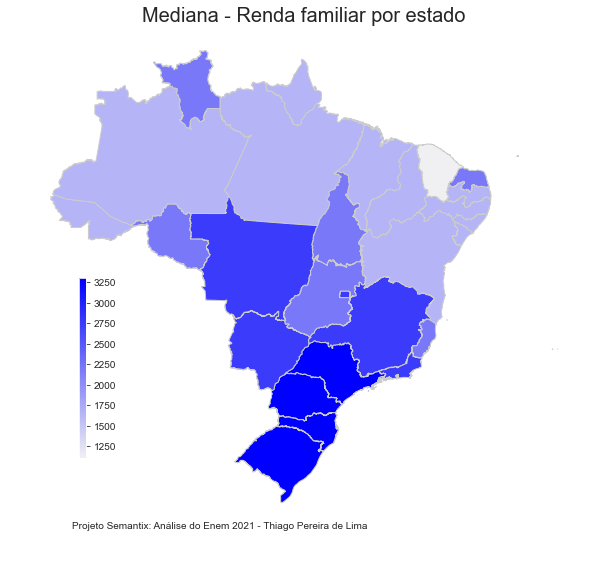

In [57]:
coluna_base = 'Renda familiar'
modo = 'mediana'

shape_novo_df = criar_coluna_geomap(coluna_base, modo)
coluna = modo.capitalize()
titulo = '{} - {} por estado'.format(coluna, coluna_base)

grafico_heatmap_brasil(titulo, coluna, shape_novo_df)

### Percentual de alunos inscritos em cada estado

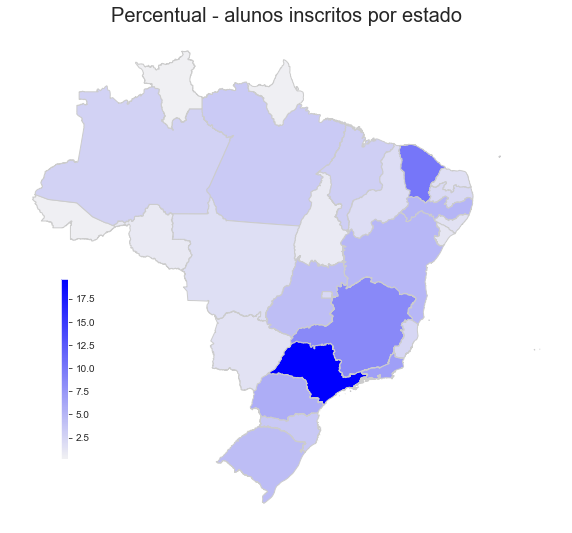

In [59]:
coluna_base = 'UF'
modo = 'percentual'

shape_novo_df = criar_coluna_geomap(coluna_base, modo)
coluna = modo.capitalize()
titulo = '{} - {} por estado'.format(coluna, 'alunos inscritos')

grafico_heatmap_brasil(titulo, coluna, shape_novo_df, src=False)

### Mediana das notas por estado

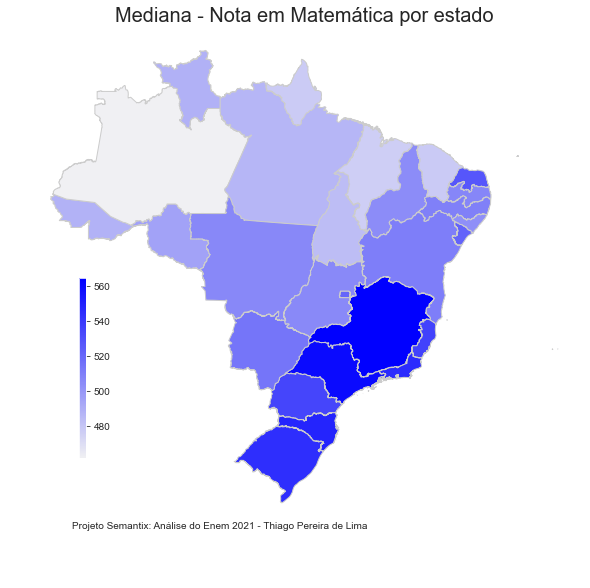

In [60]:
coluna_base = 'Nota em Matemática'
modo = 'mediana'

shape_novo_df = criar_coluna_geomap(coluna_base, modo)
coluna = modo.capitalize()
titulo = '{} - {} por estado'.format(coluna, coluna_base)

grafico_heatmap_brasil(titulo, coluna, shape_novo_df)

#  <a name="discussão">Discussão</a>
<hr style='border: 1px solid cyan;'>

[voltar ao índice](#indice)

Todas as considerações acerca das informações aqui obtidas, estão inclusas em relatório à parte no arquivo <font color='blue'><i>Relatório.pdf</i></font>.<br><br>
Entretanto, aqui apenas comentarei que ainda há muito potencial de informações a serem extraídas, tanto na base de dados original, quanto neste breve estudo efetuado. Sendo passível de futuras melhorias e expansões mediante interesse.